In [1]:
import torch
from torchvision import models

# Carregando o modelo com pesos pré-treinados na ImageNet
weights = models.ResNet50_Weights.DEFAULT
model = models.resnet50(weights=weights)

model.eval()

print("Modelo ResNet50 carregado com sucesso!")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]


Modelo ResNet50 carregado com sucesso!


In [2]:
from torchvision import transforms
from PIL import Image

def preprocess_image(image_path):
    # Definindo as transformações necessárias
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Carregar imagem
    img = Image.open(image_path).convert('RGB')
    
    # Aplicar transformações e adicionar a dimensão do "batch" (batch size = 1)
    img_tensor = preprocess(img).unsqueeze(0)
    return img_tensor

In [3]:
def predict(image_path):
    input_tensor = preprocess_image(image_path)
    
    with torch.no_grad():
        output = model(input_tensor)
    
    # Converter a saída em probabilidades usando Softmax
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    
    # Obter a classe com maior probabilidade
    top_prob, top_catid = torch.topk(probabilities, 1)
    
    # Traduzir o ID da categoria para o nome da classe (ImageNet)
    class_name = weights.meta["categories"][top_catid[0]]
    
    print(f"Resultado: {class_name} (Confiança: {top_prob.item():.2%})")

--2025-12-29 18:22:39--  https://portaledicase.com/wp-content/uploads/2024/08/gorilabatendopeito-1024x683.jpg
Resolving portaledicase.com (portaledicase.com)... 104.21.33.89, 172.67.160.183, 2606:4700:3030::6815:2159, ...
Connecting to portaledicase.com (portaledicase.com)|104.21.33.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126878 (124K) [image/jpeg]
Saving to: ‘imagem_teste.jpg’

imagem_teste.jpg    100%[===================>] 123.90K  --.-KB/s    in 0.007s  

2025-12-29 18:22:39 (16.3 MB/s) - ‘imagem_teste.jpg’ saved [126878/126878]



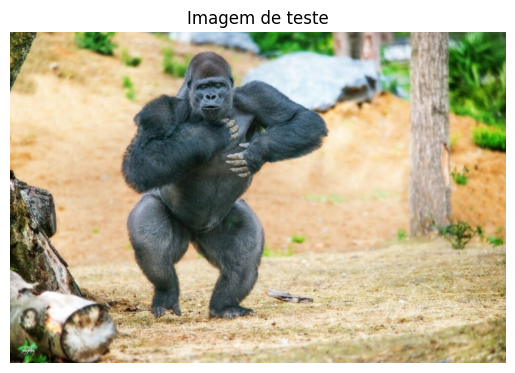

In [4]:
!wget -O imagem_teste.jpg https://portaledicase.com/wp-content/uploads/2024/08/gorilabatendopeito-1024x683.jpg #baixando a imagem 
caminho = "/kaggle/working/imagem_teste.jpg"

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(caminho)
plt.imshow(img)
plt.axis('off') # Esconde os números dos eixos
plt.title("Imagem de teste")
plt.show()

In [5]:
predict(caminho) 

Resultado: gorilla (Confiança: 45.72%)
